<a href="https://colab.research.google.com/github/fvillena/dcc-ia-nlp/blob/master/2-normalization_and_vector_semantics.sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stopwords, lematización, stemming, wordclouds y TF-IDF

Preparamos el ambiente de desarrollo

In [1]:
import spacy
import nltk
import sklearn
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
!wget https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen.csv

--2022-11-15 18:31:19--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29482924 (28M) [text/plain]
Saving to: ‘aysen.csv’

aysen.csv           100%[===================>]  28.12M   130MB/s    in 0.2s    

2022-11-15 18:31:20 (130 MB/s) - ‘aysen.csv’ saved [29482924/29482924]



In [4]:
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
!python -m spacy download es_core_news_sm

2022-11-15 18:31:29.837418: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [6]:
import es_core_news_sm
nlp_es = es_core_news_sm.load()

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


## Actividad 1: Tokenización

Tomando en cuenta este texto de entrada:

In [7]:
chilean_text = """

La gasolina en Chile ha superado los $1.000, alcanzando una alza de precio sostenida del 1,19% mensual. 
¡La gente está desesperada por llenar sus estanques!.

"""

Y la siguiente función tokenizadora que utiliza expresiones regulares:

In [8]:
# Corrígeme
# pattern = r"""(?x)                   # set flag to allow verbose regexps
#               (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
#               |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
#               |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
#               |(?:[+/\-@&*])         # special characters with meanings
#             """

pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\$?\d+(?:[.,]\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |(?:[+/\-@&*¡!.,])         # special characters with meanings
            """

def tokenizer(text):
  return nltk.regexp_tokenize(text, pattern)

Tokenice el texto utilizando la función, detecte los errores y corríjalos.

In [9]:
tokenizer(chilean_text)

['La',
 'gasolina',
 'en',
 'Chile',
 'ha',
 'superado',
 'los',
 '$1.000',
 ',',
 'alcanzando',
 'una',
 'alza',
 'de',
 'precio',
 'sostenida',
 'del',
 '1,19%',
 'mensual',
 '.',
 '¡',
 'La',
 'gente',
 'está',
 'desesperada',
 'por',
 'llenar',
 'sus',
 'estanques',
 '!',
 '.']

## Actividad 2: Stopwords

Compare las listas de stopwords asociadas a las 2 bibliotecas utiilizadas y enuncie las diferencias que pueda encontrar entre ellas.

In [10]:
# Así cargamos las listas de stopwords
nltk_stopwords = nltk.corpus.stopwords.words('spanish')
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [11]:
import random

In [12]:
print(random.sample(nltk_stopwords,10))
print(len(nltk_stopwords) == len(set(nltk_stopwords))) # Todas las palabras son distintas
print(len(nltk_stopwords))

['tendrán', 'seremos', 'es', 'serán', 'teníais', 'la', 'ella', 'estás', 'tuviese', 'os']
True
313


In [13]:
print(random.sample(spacy_stopwords,10))
print(len(spacy_stopwords) == len(set(spacy_stopwords))) # Todas las palabras son distintas
print(len(spacy_stopwords))

['podeis', 'esta', 'lado', 'dónde', 'usais', 'suyas', 'contigo', 'próximo', 'le', 'tercero']
True
521


In [14]:
stopwords = set(list(nltk_stopwords) + list(spacy_stopwords))
print(random.sample(stopwords,10))
print(len(stopwords))

['ellos', 'yo', 'conseguir', 'sean', 'menos', 'lo', 'esos', 'una', 'vais', 'pasada']
669


In [15]:
common_stopwords = []
nltk_stopwords_not_in_spacy = []
spacy_stopwords_not_in_nltk = []
for word in stopwords:
  if (word in nltk_stopwords) & (word in spacy_stopwords):
    common_stopwords.append(word)
  if word not in spacy_stopwords:
    nltk_stopwords_not_in_spacy.append(word)
  if word not in nltk_stopwords:
    spacy_stopwords_not_in_nltk.append(word)
print(random.sample(common_stopwords,10))
print(len(common_stopwords))
print(random.sample(nltk_stopwords_not_in_spacy,10))
print(len(nltk_stopwords_not_in_spacy))
print(random.sample(spacy_stopwords_not_in_nltk,10))
print(len(spacy_stopwords_not_in_nltk))

['estaba', 'tuvo', 'soy', 'vuestro', 'tanto', 'tenga', 'me', 'eso', 'hay', 'hasta']
165
['tendrás', 'tuviese', 'tuviéramos', 'estábamos', 'esté', 'sentidos', 'hubieses', 'tuvieras', 'tuvimos', 'estaríais']
148
['menos', 'podriais', 'podemos', 'podeis', 'ir', 'siguiente', 'ahí', 'aquélla', 'arriba', 'mias']
356


## Actividad 3: Stemming y lematización

Dada una lista de conjuntos de palabras (raw_words) lematice y realice stemming sobre cada palabra y compare los resultados asociados a cada conjunto de palabras.

In [16]:
raw_words = [
             ("fly","flies","flying"),
             ("organize","organizes","organizing"),
             ("universe","university")
]

In [17]:
# Así instanciamos el stemmer y lematizador

stemmer = nltk.stem.SnowballStemmer("english")
lemmatizer = nltk.stem.WordNetLemmatizer()

In [18]:
stemmer.stem("flies")

'fli'

In [19]:
lemmatizer.lemmatize("flies")

'fly'

In [20]:
stemmed_words = []
for word_set in raw_words:
  stemmed_word_set = []
  for word in word_set:
    stemmed_word_set.append(stemmer.stem(word))
  stemmed_words.append(stemmed_word_set)
print(raw_words)
print(stemmed_words)

[('fly', 'flies', 'flying'), ('organize', 'organizes', 'organizing'), ('universe', 'university')]
[['fli', 'fli', 'fli'], ['organ', 'organ', 'organ'], ['univers', 'univers']]


In [21]:
lemmatized_words = []
for word_set in raw_words:
  lemmatized_word_set = []
  for word in word_set:
    lemmatized_word_set.append(lemmatizer.lemmatize(word))
  lemmatized_words.append(lemmatized_word_set)
print(raw_words)
print(lemmatized_words)

[('fly', 'flies', 'flying'), ('organize', 'organizes', 'organizing'), ('universe', 'university')]
[['fly', 'fly', 'flying'], ['organize', 'organizes', 'organizing'], ['universe', 'university']]


## Ejemplo en Español

In [22]:
stemmer_spanish = nltk.stem.SnowballStemmer("spanish")
def lemmatizer_spanish(word):  
  doc = nlp_es(word)
  return [word.lemma_ for word in doc][0]
raw_words_spanish = ("volar", "vuela", "volando")
print(raw_words_spanish)
print([stemmer_spanish.stem(word) for word in raw_words_spanish])
print([lemmatizer_spanish(word) for word in raw_words_spanish])

('volar', 'vuela', 'volando')
['vol', 'vuel', 'vol']
['volar', 'vuela', 'volar']


# Actividad 4: TF-IDF

Utilizando el corpus newsgroups.data crea una matrix de términos y documentos utilizando tf-idf.

Utiliza la implementación que tiene sklearn de este método. Acá está la documentación.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- Después de generar la matrix, explora los valores de idf de las palabras, ¿Qué conclusión puedes esbozar al observar las palabras con mayor y menor idf?

- Establece un umbral máximo de frecuencia de documentos y verifica qué stop words se encuentran.

In [23]:
remove = ('headers', 'footers', 'quotes')
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = sklearn.datasets.fetch_20newsgroups(remove=remove,categories=categories)

In [24]:
print(newsgroups.data[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [25]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(stop_words="english",min_df=0.005)
x = tfidf_vectorizer.fit_transform(newsgroups.data)

In [26]:
idf_dict = dict(zip(tfidf_vectorizer.get_feature_names(),tfidf_vectorizer.idf_))
idf_dict = {k: v for k, v in sorted(idf_dict.items(), key=lambda item: item[1])}
print(list(idf_dict.items())[:5])
print(list(idf_dict.items())[-5:])

[('don', 2.533751684801524), ('like', 2.533751684801524), ('just', 2.5544658891890872), ('know', 2.5875658376154322), ('think', 2.6702161086960494)]
[('velocity', 6.133344448088695), ('walls', 6.133344448088695), ('weather', 6.133344448088695), ('wise', 6.133344448088695), ('workstation', 6.133344448088695)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(x) # por defecto el objeto x es una estructura iddoc, idpalabra, tfidf
print(x.toarray()) # para visualizarlo como matriz hay que utilizar el método scipy.sparse.csr_matrix.toarray()

  (0, 273)	0.09368922212815028
  (0, 930)	0.22258747962406938
  (0, 2001)	0.12628910986205008
  (0, 1880)	0.08450541569390455
  (0, 90)	0.09860769835691083
  (0, 1314)	0.06210272707022539
  (0, 2002)	0.12021459919179726
  (0, 2325)	0.300658836122034
  (0, 2024)	0.14327827672951382
  (0, 1387)	0.14179235592480932
  (0, 2011)	0.08262940410682802
  (0, 837)	0.14179235592480932
  (0, 2210)	0.1483675563448793
  (0, 1163)	0.18539354259604804
  (0, 1256)	0.06342172200756051
  (0, 718)	0.13531181677657103
  (0, 1738)	0.13661313056891214
  (0, 1619)	0.2967351126897586
  (0, 1737)	0.10968593816548777
  (0, 986)	0.0932874067883729
  (0, 896)	0.5946475416764087
  (0, 391)	0.14179235592480932
  (0, 1704)	0.150329418061017
  (0, 1390)	0.14039139252505636
  (0, 1470)	0.1179329355342265
  :	:
  (2032, 1204)	0.474737917280825
  (2032, 444)	0.11553498098901333
  (2032, 1050)	0.07825480447354656
  (2032, 196)	0.1007234365643484
  (2032, 249)	0.08843514200645457
  (2032, 994)	0.06441669693756434
  (2032, 

In [28]:
print(x.shape) # dimensiones de la matriz
print(len(tfidf_vectorizer.get_feature_names())) # el tamaño de vocabulario coincide con el número de filas
print(random.sample(tfidf_vectorizer.get_feature_names(),10))

(2034, 2562)
2562
['round', 'share', 'manufacturing', 'class', 'utah', 'game', 'fall', '1988', 'directory', 'derived']


## Ejemplo: Wordcloud

Una manera sencilla y útil de visualizar un cuerpo de texto es utilizar una nube de palabras. Esta visualización representa las palabras contenidas en un texto y codifica su tamaño en función de una métrica de peso de las palabras (frecuencia bruta o tf-idf), de esta manera palabras "más importantes" se visualizan más grandes.

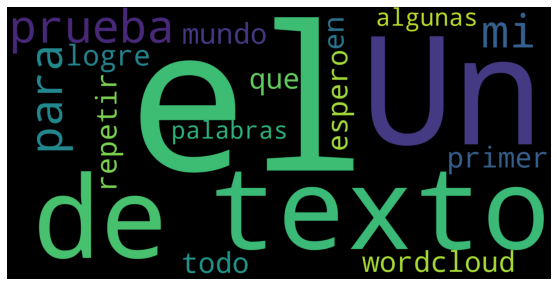

In [29]:
description = "Un texto de prueba para mi primer wordcloud en el todo el mundo, espero que logre repetir algunas palabras"
wc = wordcloud.WordCloud(width=1600, height=800).generate(description)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Actividad 5: Analizando la lista de espera chilena

El conjunto de datos aysen contiene todas las interconsultas que se realizan desde los consultorios hacia los hospitales de la región de aysén, este conjunto de datos contiene sospechas diagnósticas en texto libre. 

Desde el conjunto de datos aysen realice las siguientes tareas:

1.   Construya un wordcloud en donde se visualice la columna SOSPECHA_DIAG de la región.
2.   Construya un wordcloud con una máscara de forma utilizando la misma columna anterior (https://amueller.github.io/word_cloud/auto_examples/masked.html#sphx-glr-auto-examples-masked-py).
3.   Proponga algún tipo de filtrado para mejorar la información a comunicar a través de la nube de palabras
4.   Pondere el tamaño de las palabras según otra métrica (hint: ¿tf o idf?)



In [30]:
aysen = pd.read_csv("aysen.csv", sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
aysen.head()

,FECHA_NAC,SEXO,PRESTA_MIN,PLANO,EXTREMIDAD,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST,F_SALIDA,C_SALIDA,E_OTOR_AT,PRESTA_MIN_SALIDA,REGION,COMUNA,SOSPECHA_DIAG
0,1985,2,09-001-0,NaN,NaN,ENDODONCIA,31-12-17,25-301,25-100,NaN,NaN,NaN,NaN,11,11101,Celulitis y absceso de boca
1,1946,1,09-004-0,NaN,NaN,PERIODONCIA,31-12-17,25-301,25-100,NaN,NaN,NaN,NaN,11,11101,Periodontitis cronica
2,1937,2,09-006-0,NaN,NaN,REHABILITACION: PROTESIS REMOVIBLE,31-12-17,25-301,25-100,2018-01-03 00:00:00,1.0,25-100,09-006-0,11,11101,Otras afecciones especificadas de los dientes ...
3,1955,2,07-208-0,NaN,NaN,NEUROCIRUGIA,30-12-17,25-300,25-100,NaN,NaN,NaN,NaN,11,11101,"Trastornos de disco lumbar y otros, con radicu..."
4,1997,2,09-001-0,NaN,NaN,ENDODONCIA,30-12-17,25-301,25-100,NaN,NaN,NaN,NaN,11,11101,Celulitis y absceso de boca


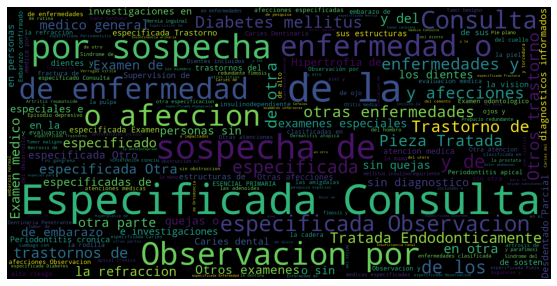

In [32]:
corpus = " ".join(aysen.SOSPECHA_DIAG.to_list())
wc = wordcloud.WordCloud(width=1600, height=800).generate(corpus)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [33]:
import re
def normalizer(text, remove_tildes = True): #normalizes a given string to lowercase and changes all vowels to their base form
    text = text.lower() #string lowering
    text = re.sub(r'[^A-Za-zñáéíóú]', ' ', text) #replaces every punctuation with a space
    if remove_tildes:
        text = re.sub('á', 'a', text) #replaces special vowels to their base forms
        text = re.sub('é', 'e', text)
        text = re.sub('í', 'i', text)
        text = re.sub('ó', 'o', text)
        text = re.sub('ú', 'u', text)
    return text

In [34]:
stopwords_normalized = map(normalizer,stopwords)
corpus_normalized = normalizer(corpus)
corpus_normalized_no_stopwords = ""
for word in corpus_normalized.split(" "):
  if (len(word) > 3) & (word not in stopwords_normalized): # aquí eliminamos las palabras con 3 caracteres o menos y los stopwords usando la lista consolidada de stopwords
    corpus_normalized_no_stopwords += word +  " "

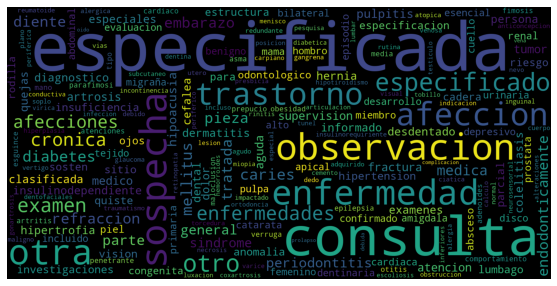

In [35]:
wc = wordcloud.WordCloud(width=1600, height=800,collocations=False).generate(corpus_normalized_no_stopwords)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [36]:
tfidf_vectorizer_aysen = sklearn.feature_extraction.text.TfidfVectorizer(stop_words="english",max_df=0.20)
x_aysen = tfidf_vectorizer_aysen.fit_transform(aysen.SOSPECHA_DIAG)

En el siguiente wordcloud mapeamos el tamaño de las palabras hacia su correspondiente valor medio de tfidf por especialidad.

In [37]:
def plot_wordcloud_from_specialty(specialty):
  tfidf_dict = dict(zip(tfidf_vectorizer_aysen.get_feature_names(),x_aysen.toarray()[aysen.PRESTA_EST == specialty].mean(0).reshape(-1,)))
  tfidf_dict = {word:val for word,val in tfidf_dict.items() if val > 0}
  wc = wordcloud.WordCloud(width=1600, height=800).generate_from_frequencies(tfidf_dict)
  plt.figure(figsize=(10,5))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


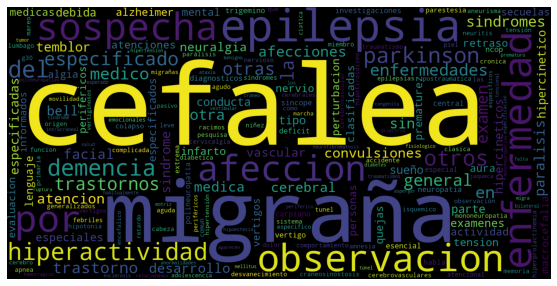

In [38]:
plot_wordcloud_from_specialty("NEUROLOGIA")

In [39]:
!wget https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/minimalist-swiss-cross-pattern-black-on-white-studio-grafiikka.jpg

--2022-11-15 18:32:41--  https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/minimalist-swiss-cross-pattern-black-on-white-studio-grafiikka.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 13.32.87.23, 13.32.87.88, 13.32.87.76, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|13.32.87.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74035 (72K) [image/jpeg]
Saving to: ‘minimalist-swiss-cross-pattern-black-on-white-studio-grafiikka.jpg’

minimalist-swiss-cr 100%[===================>]  72.30K  --.-KB/s    in 0.02s   

2022-11-15 18:32:41 (3.90 MB/s) - ‘minimalist-swiss-cross-pattern-black-on-white-studio-grafiikka.jpg’ saved [74035/74035]



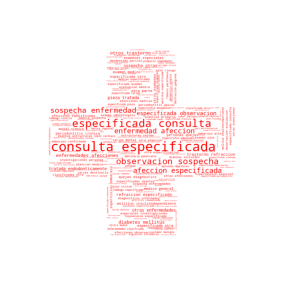

In [40]:
import PIL
import numpy as np
mask = np.array(PIL.Image.open("minimalist-swiss-cross-pattern-black-on-white-studio-grafiikka.jpg"))
wc = wordcloud.WordCloud(width=800, height=800,mask=mask, background_color="white",color_func=lambda *args, **kwargs: "red").generate(corpus_normalized_no_stopwords)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()